## **Parte 1**: Entrenamiento Incremental

**Inciso 1**: En el documento.

Algoritmos a usar: 

1. Redes Neuronales Artificiales
2. Random Forest

Consideraciones: 

1. **Análisis Exploratorio de Datos (EDA):** Antes del entrenamiento de modelos, realicen un análisis exploratorio para entender las características del dataset, incluyendo visualizaciones, análisis de correlaciones y la distribución de las clases.

2. **Feature Engineering:** El feature engineering es crucial.Deben explorar la creación de nuevas características que puedan incluir, pero no se limiten a, variables temporales (como la hora del día, día de la semana, estacionalidad), frecuencia de transacciones por cliente, montos promedio de transacción, y diversidad de comercios visitados por cada tarjetahabiente. La  normalización o estandarización de estas características también es importante dependiendo del algoritmo. Para esta tarea de feature emgineering explicaremos como realizarlo y además entregaremos un script modelo en Python.

3. **Manejo de Datos Desequilibrados:** Explore técnicas como oversampling, undersampling, o generación de datos sintéticos (ej., SMOTE) para manejar el desequilibrio en la clasificación de transacciones normales y fraudulentas.

4. **Afinación de Hiperparámetros:** Experimente con la optimización de hiperparámetros para mejorar el rendimiento de los modelos,tanto en entrenamientos iniciales como incrementales.

5. **Estrategias de Early Stopping:** Implemente early stopping en modelos de deep learning para prevenir el overfitting y reducir el tiempo de entrenamiento,crucial en escenarios de entrenamiento incremental. 
 
6. **Métricas Específicas para Datos Desequilibrados:** Utilice métricas como ROC-AUC o la curva de precisión-recall para evaluar de manera más efectiva el rendimiento del modelo en el contexto de datos desequilibrados. 

**Inciso 2:** Implementación práctica 

**Análisis exploratorio**

In [1]:
!pip install folium

DEPRECATION: torchsde 0.2.5 has a non-standard dependency specifier numpy>=1.19.*; python_version >= "3.7". pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torchsde or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('./archive_new_feats/fraud_feature_engineering_example.csv')

Encabezados del dataset

In [4]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,amt_month,amt_year,amt_month_shopping_net_spend,count_month_shopping_net,first_time_at_merchant
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,4.97,4.97,0.0,0.0,True
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,107.23,107.23,0.0,0.0,True
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,220.11,220.11,0.0,0.0,True
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,45.00,45.00,0.0,0.0,True
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,41.96,41.96,0.0,0.0,True


Descripción estadística del dataset

In [5]:
print(df.describe())

             cc_num           amt           zip           lat          long   
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  \
mean   4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01 -9.022783e+01   
std    1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00  1.374789e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01 -9.679800e+01   
50%    3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud   
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  \
mean   8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01  5.210015e-03   
std    3.014876e+05  1.819508e+07  5.105604e+00  1.

Histograma de la variable "amt"

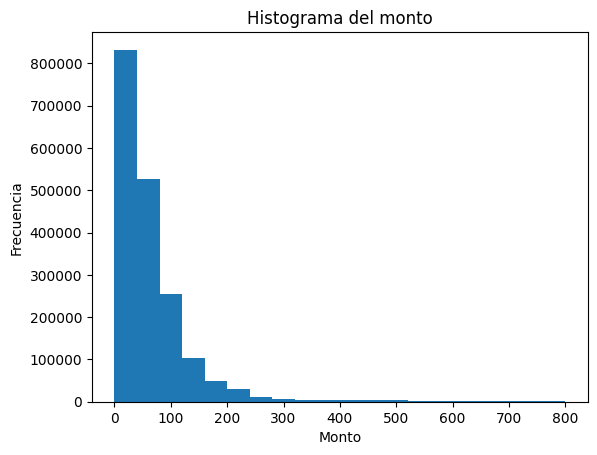

In [6]:
bin_range = (0, 800)

plt.hist(df['amt'], bins=20, range=bin_range)
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.title('Histograma del monto')
plt.show()

Gráfico de barras para la variable category

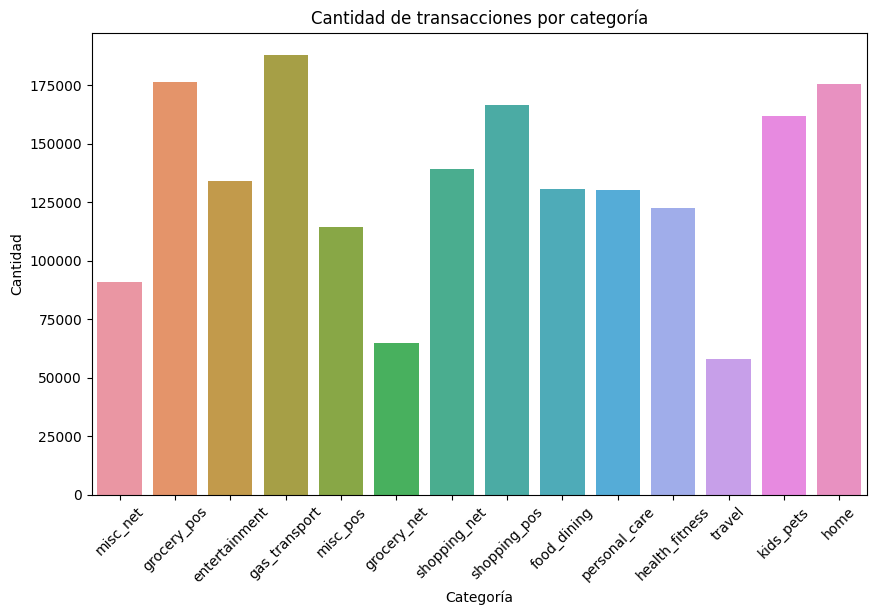

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df)
plt.xticks(rotation=45)
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.title('Cantidad de transacciones por categoría')
plt.show()

Gráfico de dispersión de 'amt' vs 'amt_year' con colores según 'is_fraud'

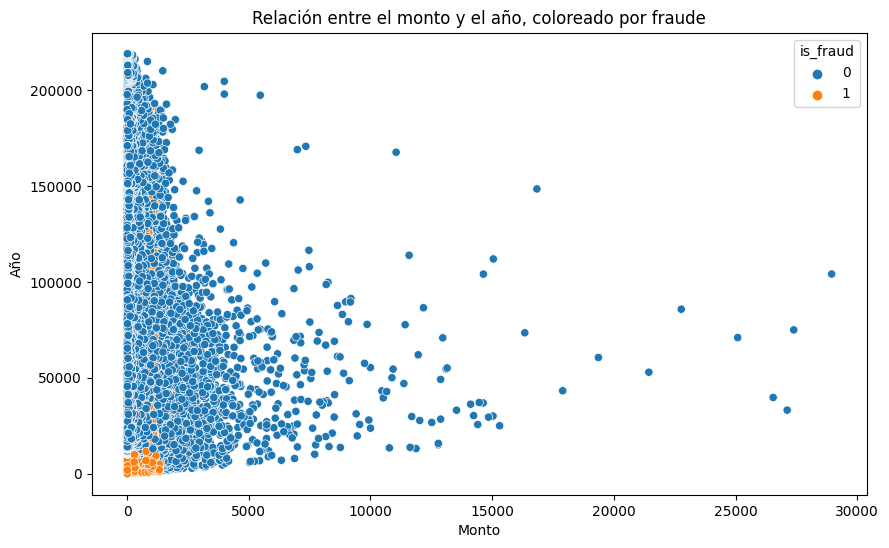

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='amt', y='amt_year', hue='is_fraud', data=df)
plt.xlabel('Monto')
plt.ylabel('Año')
plt.title('Relación entre el monto y el año, coloreado por fraude')
plt.show()

Visualizando las correlaciones del dataset

                                cc_num       amt       zip       lat   
cc_num                        1.000000  0.001826  0.041504 -0.058744  \
amt                           0.001826  1.000000  0.001979 -0.000670   
zip                           0.041504  0.001979  1.000000 -0.114554   
lat                          -0.058744 -0.000670 -0.114554  1.000000   
long                         -0.048429 -0.000735 -0.909795 -0.014744   
city_pop                     -0.009118  0.004921  0.077601 -0.154816   
unix_time                     0.000284 -0.002411  0.001017  0.000741   
merch_lat                    -0.058415 -0.000613 -0.113934  0.993582   
merch_long                   -0.048421 -0.000711 -0.908981 -0.014709   
is_fraud                     -0.001125  0.209308 -0.002190  0.002904   
amt_month                    -0.003724  0.063139  0.026919 -0.016960   
amt_year                     -0.002399  0.020724  0.029880 -0.020163   
amt_month_shopping_net_spend -0.007375  0.075108  0.019911 -0.02

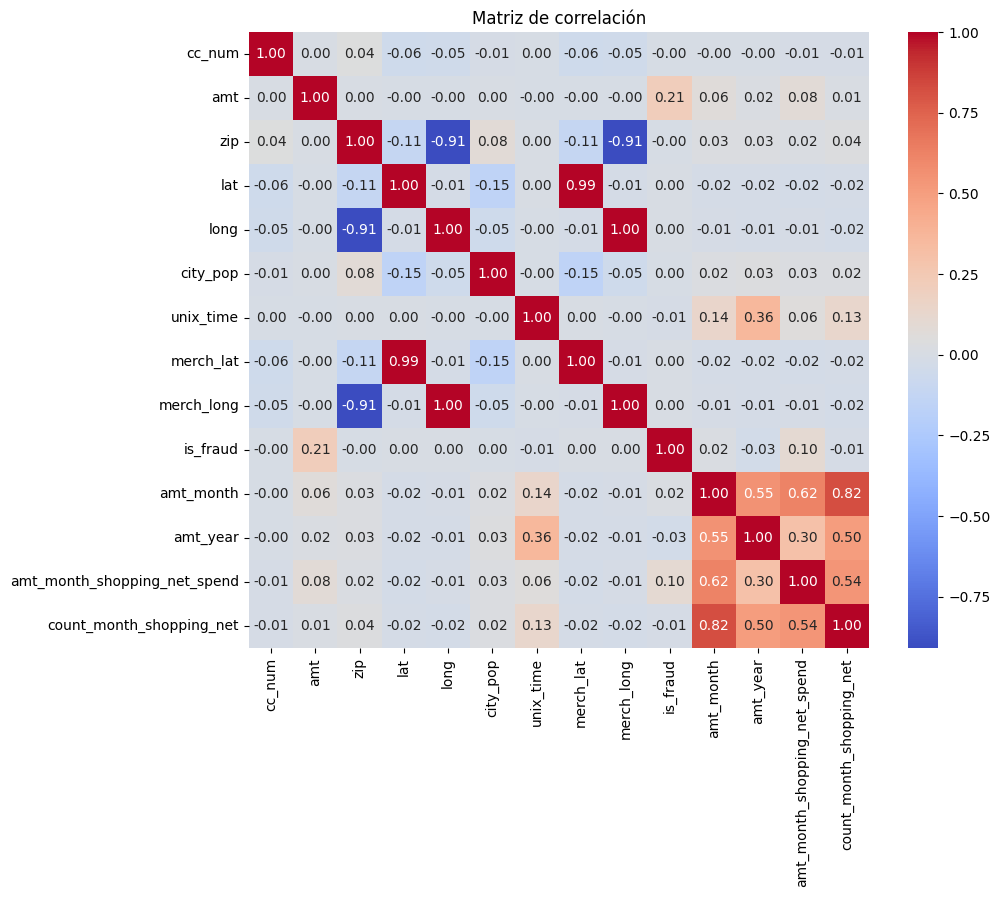

In [9]:
# Seleccionando las columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()

print(correlation_matrix)

# Graficando la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

Visualización de la distribución de las clases para verificar si hay desbalances en el dataset.

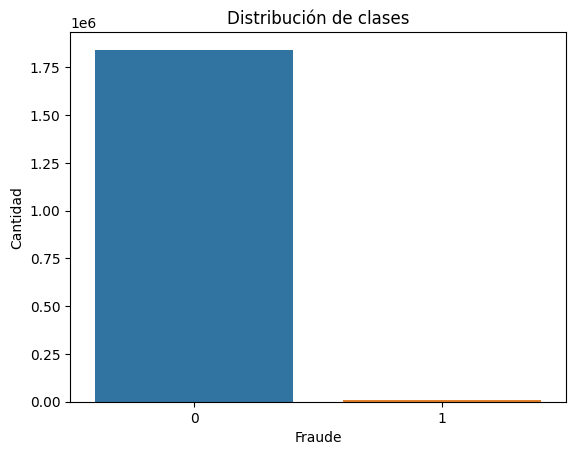

In [10]:
sns.countplot(x='is_fraud', data=df)
plt.xlabel('Fraude')
plt.ylabel('Cantidad')
plt.title('Distribución de clases')
plt.show()

Exploración de variables categóricas

Tabla de frecuencia de la variable 'merchant':
                                  Merchant  Frequency
0                        fraud_Kilback LLC       6262
1                        fraud_Cormier LLC       5246
2                         fraud_Schumm PLC       5195
3                           fraud_Kuhn LLC       5031
4                          fraud_Boyer PLC       4999
..                                     ...        ...
688    fraud_Douglas, DuBuque and McKenzie       1101
689                     fraud_Treutel-King       1098
690                 fraud_Satterfield-Lowe       1095
691     fraud_Hahn, Douglas and Schowalter       1091
692  fraud_Ritchie, Bradtke and Stiedemann       1090

[693 rows x 2 columns]


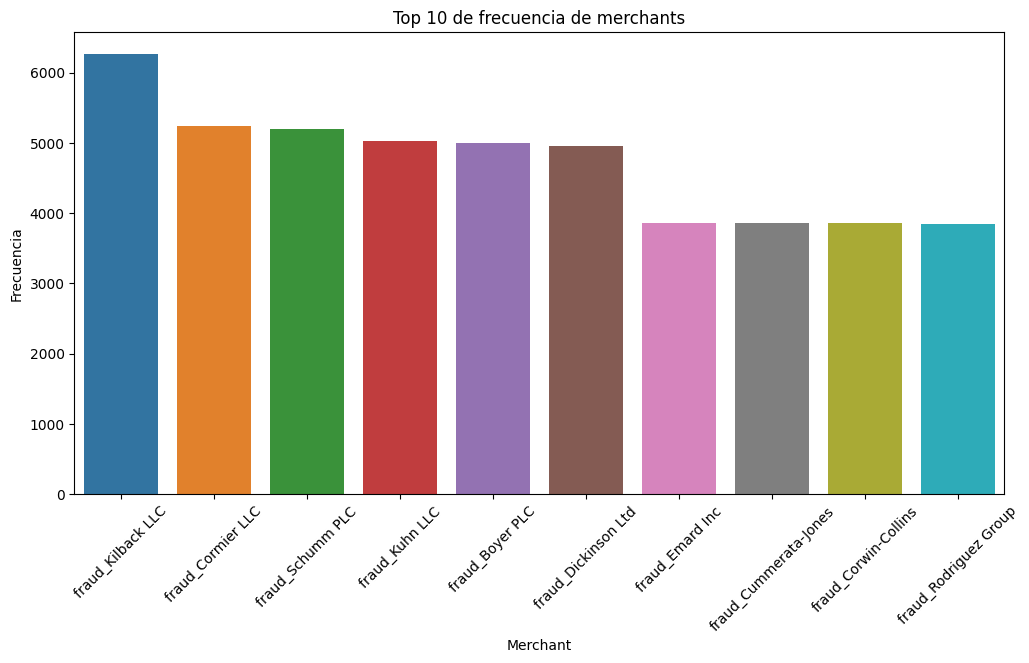

In [11]:
# Tabla de frecuencia de la variable 'merchant'
merchant_freq = df['merchant'].value_counts().reset_index()
merchant_freq.columns = ['Merchant', 'Frequency']
print("Tabla de frecuencia de la variable 'merchant':")
print(merchant_freq)

# Gráfico de barras de las 10 categorías más frecuentes
top_merchants = merchant_freq.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Merchant', y='Frequency', data=top_merchants)
plt.xlabel('Merchant')
plt.ylabel('Frecuencia')
plt.title('Top 10 de frecuencia de merchants')
plt.xticks(rotation=45)
plt.show()

Exploración de variables categóricas

Tabla de contingencia de 'category' vs 'is_fraud':
is_fraud             0     1
category                    
entertainment   133826   292
food_dining     130524   205
gas_transport   187257   772
grocery_net      64703   175
grocery_pos     173963  2228
health_fitness  122368   185
home            175195   265
kids_pets       161423   304
misc_net         89472  1182
misc_pos        113907   322
personal_care   129795   290
shopping_net    137103  2219
shopping_pos    165407  1056
travel           57800   156


<Figure size 1000x600 with 0 Axes>

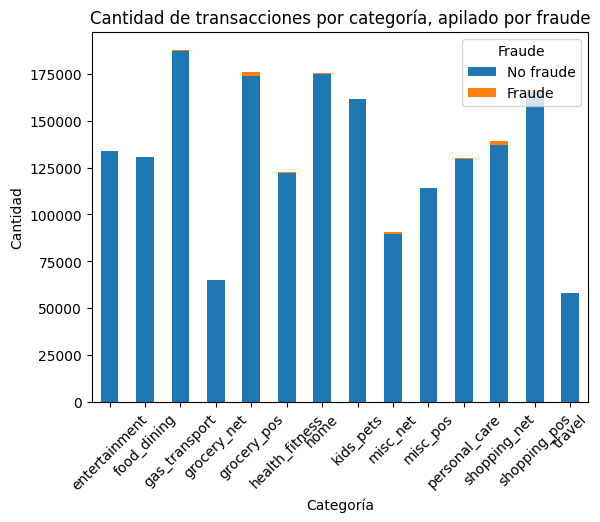

In [12]:
# Tabla de contingencia de 'category' vs 'is_fraud'
contingency_table = pd.crosstab(df['category'], df['is_fraud'])
print("Tabla de contingencia de 'category' vs 'is_fraud':")
print(contingency_table)

# Gráfico de barras apiladas de 'category' vs 'is_fraud'
plt.figure(figsize=(10, 6))
contingency_table.plot(kind='bar', stacked=True)
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.title('Cantidad de transacciones por categoría, apilado por fraude')
plt.xticks(rotation=45)
plt.legend(title='Fraude', labels=['No fraude', 'Fraude'])
plt.show()

Análisis temporal

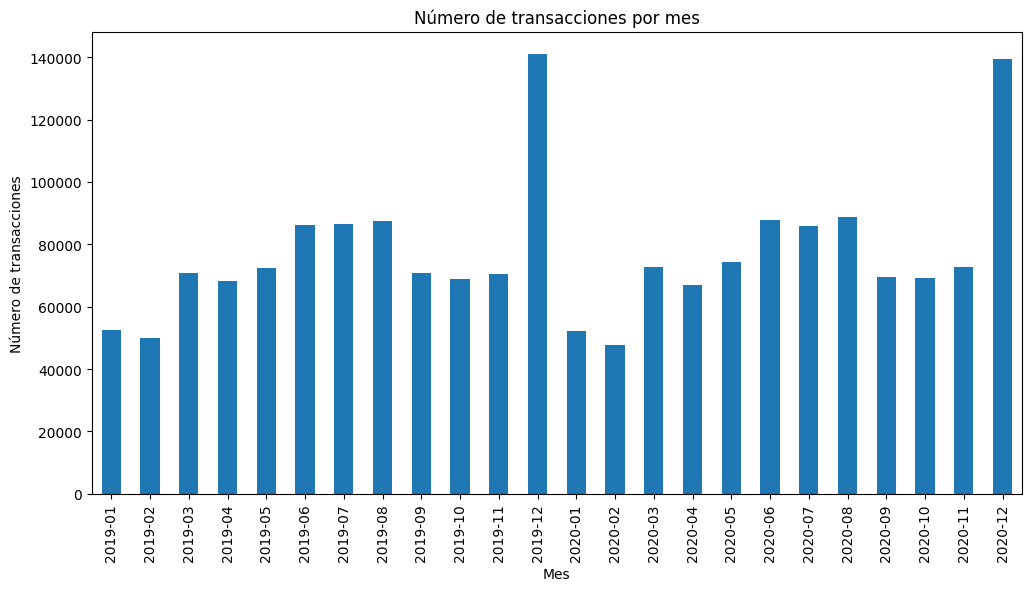

In [13]:
#Convirtiendo la variable 'trans_date_trans_time' a tipo datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Agrupando transacciones por mes y contar el número de transacciones en cada mes
transactions_by_month = df.groupby(df['trans_date_trans_time'].dt.to_period('M')).size()

# Graficando las transacciones por mes
plt.figure(figsize=(12, 6))
transactions_by_month.plot(kind='bar')
plt.xlabel('Mes')
plt.ylabel('Número de transacciones')
plt.title('Número de transacciones por mes')
plt.show()

Análisis de variables relacionadas con la geografía

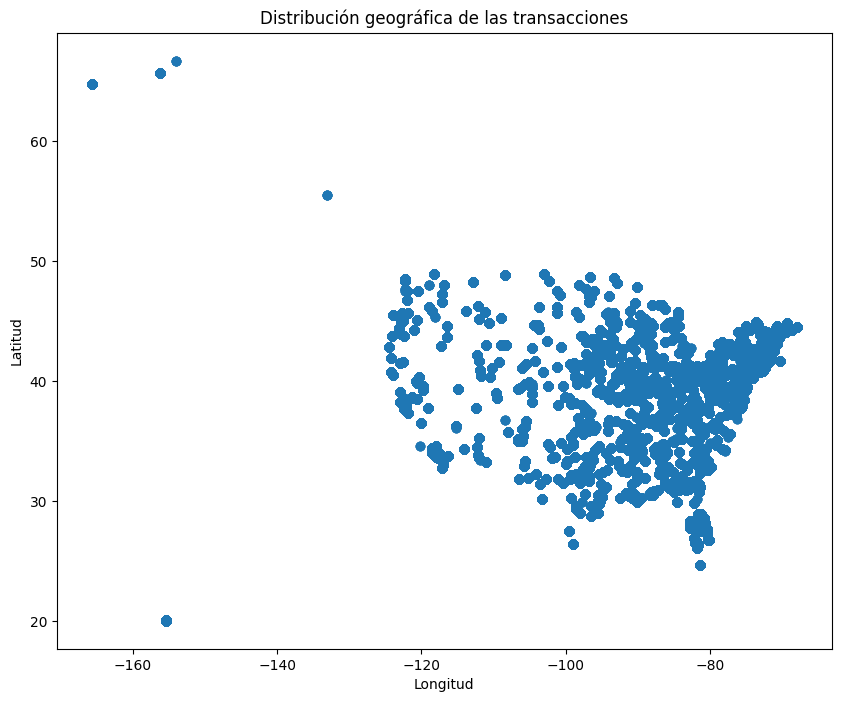

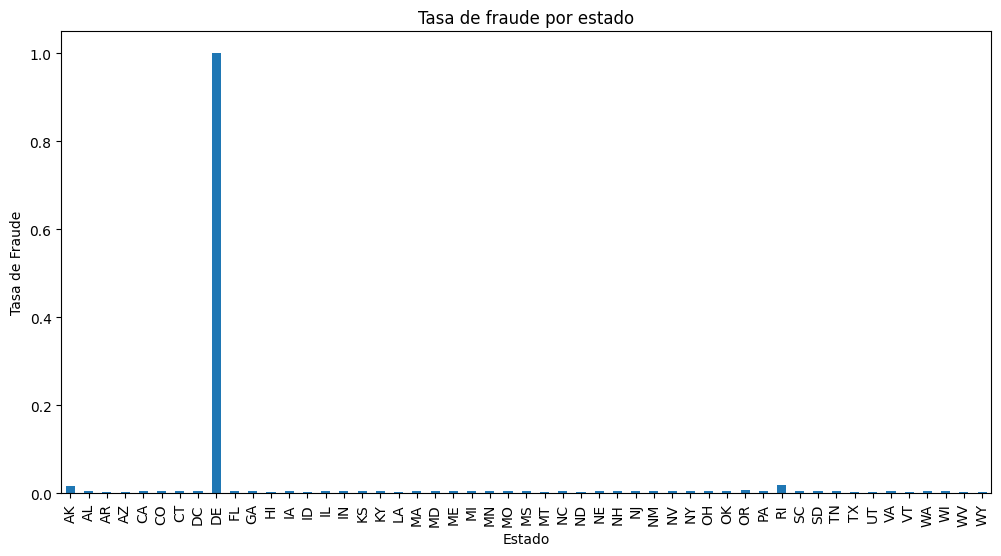

In [14]:
# Gráfico de dispersión de latitud vs longitud
plt.figure(figsize=(10, 8))
plt.scatter(df['long'], df['lat'], alpha=0.5)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución geográfica de las transacciones')
plt.show()

# Gráfico de barras apiladas de fraude por estado
fraud_by_state = df.groupby('state')['is_fraud'].mean()
plt.figure(figsize=(12, 6))
fraud_by_state.plot(kind='bar')
plt.xlabel('Estado')
plt.ylabel('Tasa de Fraude')
plt.title('Tasa de fraude por estado')
plt.show()

Mapa con las ubicaciones mundiales

In [15]:
# # Creando un mapa mundial
# mapa_mundial = folium.Map(location=[0, 0], zoom_start=2)

# # Añadiendo un marcador para cada transacción que esté en el dataset
# for index, row in df.iterrows():
#     folium.Marker([row['lat'], row['long']], 
#                   popup=f"Fraude: {row['is_fraud']}, Monto: {row['amt']}").add_to(mapa_mundial)

# # Enseñando el mapa
# mapa_mundial

Gráfico de dispersión de "amt" vs "amt_month" con colores según "is_fraud"

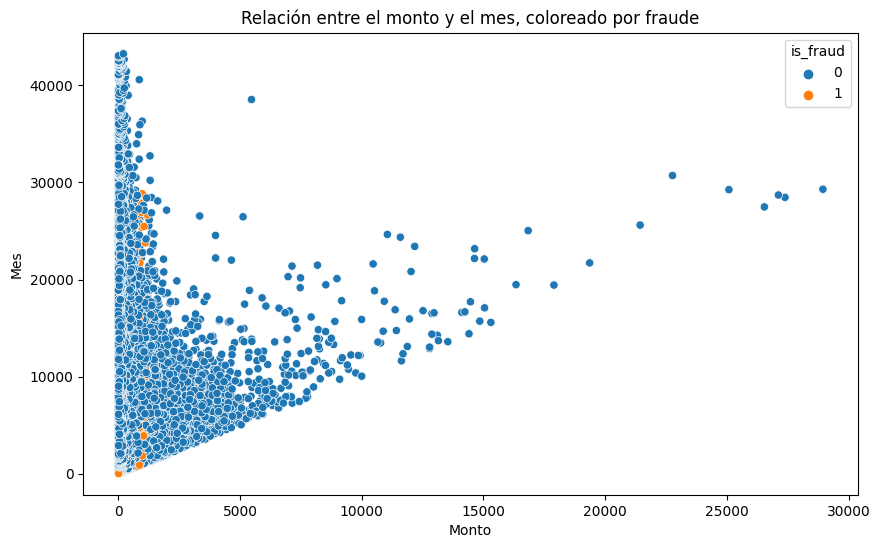

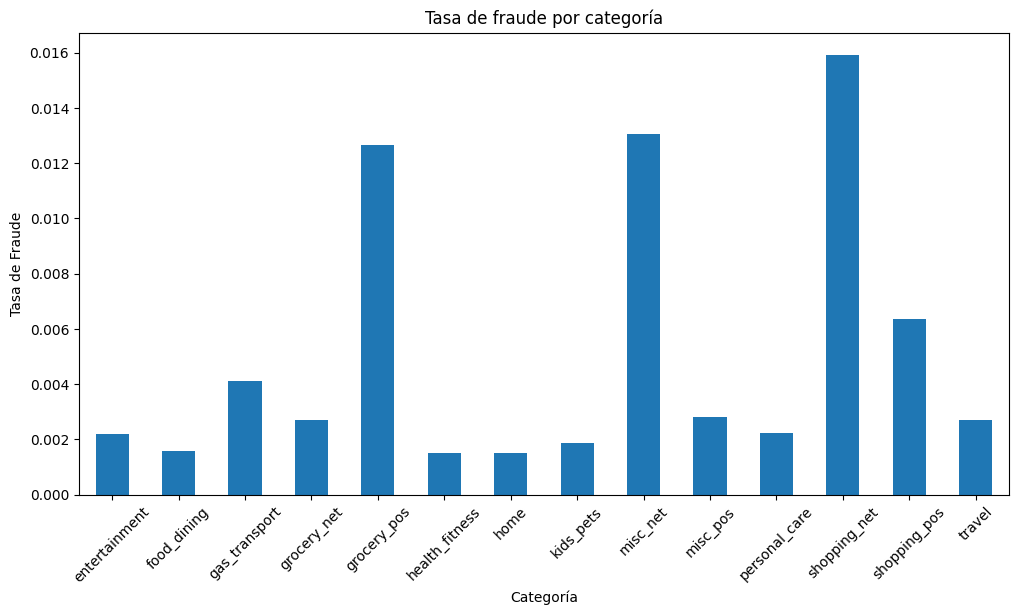

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='amt', y='amt_month', hue='is_fraud', data=df)
plt.xlabel('Monto')
plt.ylabel('Mes')
plt.title('Relación entre el monto y el mes, coloreado por fraude')
plt.show()

# Gráfico de barras apiladas de fraude por categoría
fraud_by_category = df.groupby('category')['is_fraud'].mean()
plt.figure(figsize=(12, 6))
fraud_by_category.plot(kind='bar')
plt.xlabel('Categoría')
plt.ylabel('Tasa de Fraude')
plt.title('Tasa de fraude por categoría')
plt.xticks(rotation=45)
plt.show()

**Feature Engineering**

Creando características de tiempo

In [17]:
# Convertiendo 'trans_date_trans_time' a tipo datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Creando nuevas características de tiempo
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
df['month'] = df['trans_date_trans_time'].dt.month

Frecuencia de transacciones por cliente

In [18]:
# Calculando la frecuencia de transacciones por cliente
transaction_frequency = df.groupby('cc_num').size().reset_index(name='transaction_frequency')

# Fusionando la frecuencia de transacciones con el DataFrame original
df = pd.merge(df, transaction_frequency, on='cc_num', how='left')

Calculando los montos promedio por transacción

In [19]:
# Calculando el monto promedio de transacción por cliente
average_transaction_amount = df.groupby('cc_num')['amt'].mean().reset_index(name='average_transaction_amount')

# Fusionando el monto promedio de transacción con el DataFrame original
df = pd.merge(df, average_transaction_amount, on='cc_num', how='left')

Viendo que comercios visitó el dueño de la tarjeta

In [20]:
# Calculando la diversidad de comercios visitados por cada tarjetahabiente
unique_merchants_visited = df.groupby('cc_num')['merchant'].nunique().reset_index(name='unique_merchants_visited')

# Fusionando la diversidad de comercios visitados con el DataFrame original
df = pd.merge(df, unique_merchants_visited, on='cc_num', how='left')

Guardando el dataset

In [21]:
ruta = "./archive_new_feats/"

df.to_csv(ruta + 'dataset_clean.csv', index=False)

Aplicando el balance de clases en el nuevo dataset

In [22]:
df_procesado = pd.read_csv('./archive_new_feats/dataset_clean.csv')

Aplicando el modelo para el 2019

Aplicando el balance de clases y la normalización para los datos de 2019

In [23]:
import numpy as np
from imblearn.over_sampling import SMOTE

df_procesado['trans_date_trans_time'] = pd.to_datetime(df_procesado['trans_date_trans_time'])

# Seleccionar los datos correspondientes al año 2019
year_2019_data = df_procesado[df_procesado['trans_date_trans_time'].dt.year == 2019]

X = year_2019_data.drop(columns=['is_fraud', "trans_date_trans_time"])  # Características
X = X.select_dtypes(include=['float64', 'int64'])  # Seleccionar solo las columnas numéricas
y = year_2019_data['is_fraud']  # Variable objetivo

# Normalizando tus características si es necesario
scaler = StandardScaler()
X = scaler.fit_transform(X)

sampling_strategy = {0: 1, 1: 5}

# Divide el conjunto de datos en Train y Test
X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Divide el conjunto de entrenamiento y desarrollo (TrainDev) en Train y Dev
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, test_size=0.25, random_state=42)

# Convertir los datos a arrays NumPy
X_train, y_train = np.array(X_train), np.array(y_train)

# Crear el objeto SMOTE
smote = SMOTE(sampling_strategy="auto")

# Ajustar y aplicar el sobremuestreo
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

**Implementación práctica**

Redes neuronales

In [24]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import roc_curve, auc, recall_score, f1_score

# Definiwbsi la arquitectura de la red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_res.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilando el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenando el modelo
history = model.fit(X_train_res, y_train_res, epochs=5, batch_size=256, validation_data=(X_dev, y_dev))

# Evaluando el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Predeciendo probabilidades en el conjunto de prueba
y_pred_prob = model.predict(X_test)

# Convertiendo probabilidades en predicciones de clases
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculando la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

# Calculando el recall y el F1-score
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Recall:', recall)
print('F1-score:', f1)

Epoch 1/5
4312/4312 [==============================] - 13s 3ms/step - loss: 0.1680 - accuracy: 0.9328 - val_loss: 0.1051 - val_accuracy: 0.9619
Epoch 2/5
4312/4312 [==============================] - 11s 3ms/step - loss: 0.0996 - accuracy: 0.9640 - val_loss: 0.1179 - val_accuracy: 0.9561
Epoch 3/5
4312/4312 [==============================] - 11s 3ms/step - loss: 0.0806 - accuracy: 0.9721 - val_loss: 0.0994 - val_accuracy: 0.9640
Epoch 4/5
4312/4312 [==============================] - 12s 3ms/step - loss: 0.0707 - accuracy: 0.9761 - val_loss: 0.0768 - val_accuracy: 0.9725
Epoch 5/5
5781/5781 [==============================] - 11s 2ms/step - loss: 0.0735 - accuracy: 0.9744
Test accuracy: 0.974363386631012
5781/5781 [==============================] - 9s 2ms/step
AUC: 0.9753308433599086
Recall: 0.8421052631578947
F1-score: 0.27425772880318333


Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, recall_score, f1_score, accuracy_score

# Inicializando el clasificador RandomForest
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

# Entrenando el clasificador
rf_classifier.fit(X_train_res, y_train_res)

# Predeciendo clases en el conjunto de prueba
y_pred = rf_classifier.predict(X_test)

# Calculando el accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Predeciendo probabilidades en el conjunto de prueba
y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Calculando la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

# Calculando el recall y el F1-score
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.9971238579229064
AUC: 0.9655983613195986
Recall: 0.7208646616541353
F1-score: 0.7424975798644724


Haciendo modelos para el año 2020

In [26]:
import numpy as np
from imblearn.over_sampling import SMOTE

df_procesado['trans_date_trans_time'] = pd.to_datetime(df_procesado['trans_date_trans_time'])

# Seleccionar los datos correspondientes al año 2019
year_2019_data = df_procesado[df_procesado['trans_date_trans_time'].dt.year == 2020]

X = year_2019_data.drop(columns=['is_fraud', "trans_date_trans_time"])  # Características
X = X.select_dtypes(include=['float64', 'int64'])  # Seleccionar solo las columnas numéricas
y = year_2019_data['is_fraud']  # Variable objetivo

# Normalizando tus características si es necesario
scaler = StandardScaler()
X = scaler.fit_transform(X)

sampling_strategy = {0: 1, 1: 5}

# Divide el conjunto de datos en Train y Test
X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Divide el conjunto de entrenamiento y desarrollo (TrainDev) en Train y Dev
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, test_size=0.25, random_state=42)

# Convertir los datos a arrays NumPy
X_train, y_train = np.array(X_train), np.array(y_train)

# Crear el objeto SMOTE
smote = SMOTE(sampling_strategy="auto")

# Ajustar y aplicar el sobremuestreo
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

Redes neuronales

In [27]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import roc_curve, auc, recall_score, f1_score

# Definiwbsi la arquitectura de la red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_res.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilando el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenando el modelo
history = model.fit(X_train_res, y_train_res, epochs=5, batch_size=256, validation_data=(X_dev, y_dev))

# Evaluando el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Predeciendo probabilidades en el conjunto de prueba
y_pred_prob = model.predict(X_test)

# Convertiendo probabilidades en predicciones de clases
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculando la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

# Calculando el recall y el F1-score
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Recall:', recall)
print('F1-score:', f1)

# Guardar el modelo en un archivo y abrirlo para reentrenarlo con el modelo ya armado.
# Hacer lo mismo con el Random Forest.

Epoch 1/5
4327/4327 [==============================] - 14s 3ms/step - loss: 0.1537 - accuracy: 0.9391 - val_loss: 0.0901 - val_accuracy: 0.9677
Epoch 2/5
4327/4327 [==============================] - 12s 3ms/step - loss: 0.0882 - accuracy: 0.9680 - val_loss: 0.0703 - val_accuracy: 0.9749
Epoch 3/5
4327/4327 [==============================] - 12s 3ms/step - loss: 0.0710 - accuracy: 0.9753 - val_loss: 0.0773 - val_accuracy: 0.9720
Epoch 4/5
4327/4327 [==============================] - 12s 3ms/step - loss: 0.0607 - accuracy: 0.9797 - val_loss: 0.0739 - val_accuracy: 0.9736
Epoch 5/5
5798/5798 [==============================] - 11s 2ms/step - loss: 0.0740 - accuracy: 0.9736
Test accuracy: 0.9735699892044067
5798/5798 [==============================] - 9s 2ms/step
AUC: 0.9809718302794419
Recall: 0.8883977900552487
F1-score: 0.24696667178620796


Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, recall_score, f1_score, accuracy_score

# Inicializando el clasificador RandomForest
rf_classifier = RandomForestClassifier(n_estimators=8, random_state=42)

# Entrenando el clasificador
rf_classifier.fit(X_train_res, y_train_res)

# Predeciendo clases en el conjunto de prueba
y_pred = rf_classifier.predict(X_test)

# Calculando el accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Predeciendo probabilidades en el conjunto de prueba
y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Calculando la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

# Calculando el recall y el F1-score
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.9971807297759139
AUC: 0.9620825033750011
Recall: 0.6972375690607735
F1-score: 0.7070028011204482
